<a href="https://colab.research.google.com/github/Chirayush2001/LinearRegression-Dataset-Advertising-Data-/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     \ 22.0 MB 135 kB/s
     |████████████████████████████████| 102 kB 24.4 MB/s 
     |████████████████████████████████| 679 kB 56.5 MB/s 
     |████████████████████████████████| 62 kB 1.9 MB/s 
     |████████████████████████████████| 9.9 MB 59.5 MB/s 
     |████████████████████████████████| 4.7 MB 30.4 MB/s 
     |████████████████████████████████| 296 kB 65.8 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-dev-py2.py3-none-any.whl size=328499 sha256=43898ac6d49a0bd832953df57d21b1d170c7e058d6cb77de3dab634b7b631600
  Stored in directory: /tmp/pip-ephem-wheel-cache-ccnk7q_z/wheels/64/b6/85/dfc808b23666a5910371784e349d28818006ff63ed9cfeca59
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=6a43ead7081cddd85ee1e081871c7e581632afc4aa172e14b1d760175314b687
  Stored in directory: /root/.cache/pip/wheels/23/14/6e/4be5bfeeb027f4939a01764

In [ ]:
import os
os._exit(00)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
from pandas_profiling import ProfileReport
import pandas_profiling as pp

In [3]:
df=pd.read_csv('/content/Advertising.csv')

In [4]:
profile=ProfileReport(df)

In [5]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
df

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [ ]:
profile.to_file('test.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
x=df[['TV']]
x

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8
...,...
195,38.2
196,94.2
197,177.0
198,283.6


In [8]:
y=df[['Sales']]
y

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9
...,...
195,7.6
196,9.7
197,12.8
198,25.5


In [9]:
import sklearn
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [10]:
Lreg = LinearRegression()

In [22]:
X = np.array(x)
Y = np.array(y)
X1 = X.reshape(-1,1)
Y1 = Y.reshape(-1,1)

In [11]:
Lreg.fit(x,y)

LinearRegression()

In [12]:
print("The estimated intercept coefficient is %.2f"%Lreg.intercept_)

The estimated intercept coefficient is 7.03


In [13]:
Lreg.coef_

array([[0.04753664]])

In [14]:
print("The number of coefficients used are %d"%len(Lreg.coef_))

The number of coefficients used are 1


In [15]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [16]:
# Print shapes of the training and testing data sets
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(160, 1) (40, 1) (160, 1) (40, 1)


Predicting Prices

In [17]:
Lreg.fit(x_train,y_train)

LinearRegression()

Now run a prediction on both the X training set and the testing set.

In [ ]:
pred_train=Lreg.predict(x_train)
Y_pred=Lreg.predict(x_test)
pred_train
Y_pred

Now we will get the mean square error

In [20]:
print("Fit a model x_train, and calculate MSE with y_train: %.2f"  % np.mean((y_train - pred_train) ** 2))
    
print("Fit a model x_train, and calculate MSE with x_test and y_test: %.2f"  %np.mean((y_test - Y_pred) ** 2))

Fit a model x_train, and calculate MSE with y_train: 10.62
Fit a model x_train, and calculate MSE with x_test and y_test: 10.19


In [21]:
r2_score(y_test,Y_pred)

0.6763151577939721

It looks like our mean square error between our training and testing was pretty close. But how do we actually visualize this?

Text(0.5, 1.0, 'Residual Plots')

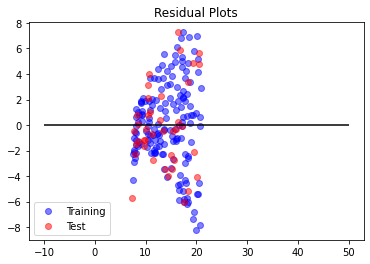

In [98]:
# Scatter plot the training data
train = plt.scatter(pred_train,(y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(Y_pred,(y_test-Y_pred),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-10,xmax=50)

#Labels
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

In [22]:
#This file saves the Linear Regression Model which can be used as and when required
file = 'linear_reg.sav'
pickle.dump(Lreg,open(file,'wb'))

In [23]:
Lreg.predict([[45]])

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[9.36284431]])